In [17]:
# Symbolic equations
from sympy import *
init_printing(use_unicode=True)

In [18]:
s1 = Symbol('S11')
s2 = Symbol('S22')
s3 = Symbol('S33')
S = Symbol('S')
S = Matrix([[s1, 0, 0], [0, s2, 0], [0, 0, s3]])
dSdt = Symbol('dSdt')
S

⎡S₁₁   0    0 ⎤
⎢             ⎥
⎢ 0   S₂₂   0 ⎥
⎢             ⎥
⎣ 0    0   S₃₃⎦

In [19]:
i1 = Symbol('I11')
i2 = Symbol('I22')
i3 = Symbol('I33')
i12 = Symbol('I12')
i23 = Symbol('I23')
I = Symbol('I')
I = Matrix([[i1, i12, 0], [0, i2, i23], [0, 0, i3]])
dIdt = Symbol('dIdt')
I

⎡I₁₁  I₁₂   0 ⎤
⎢             ⎥
⎢ 0   I₂₂  I₂₃⎥
⎢             ⎥
⎣ 0    0   I₃₃⎦

In [20]:
beta11 = Symbol('beta11')
beta22 = Symbol('beta22')
beta33 = Symbol('beta33')
beta12 = Symbol('beta12')
beta23 = Symbol('beta23')
Beta = Symbol('Beta')
Beta = Matrix([[beta11, beta12, 0], [0, beta22, beta23], [0, 0, beta33]])
Beta

⎡β₁₁  β₁₂   0 ⎤
⎢             ⎥
⎢ 0   β₂₂  β₂₃⎥
⎢             ⎥
⎣ 0    0   β₃₃⎦

In [21]:
gamma = Symbol('gamma')
Gamma = Symbol('Gamma')
Gamma = Matrix([[gamma, 0, 0], [0, gamma, 0], [0, 0, gamma]])
Gamma

⎡γ  0  0⎤
⎢       ⎥
⎢0  γ  0⎥
⎢       ⎥
⎣0  0  γ⎦

In [22]:
dSdt = -I*Beta.T*S
dSdt

⎡S₁₁⋅(-I₁₁⋅β₁₁ - I₁₂⋅β₁₂)        -I₁₂⋅S₂₂⋅β₂₂             0      ⎤
⎢                                                                ⎥
⎢      -I₂₂⋅S₁₁⋅β₁₂        S₂₂⋅(-I₂₂⋅β₂₂ - I₂₃⋅β₂₃)  -I₂₃⋅S₃₃⋅β₃₃⎥
⎢                                                                ⎥
⎣           0                    -I₃₃⋅S₂₂⋅β₂₃        -I₃₃⋅S₃₃⋅β₃₃⎦

In [23]:
dIdt = S*Beta.T*I - Gamma.T*I
dIdt

⎡I₁₁⋅S₁₁⋅β₁₁ - I₁₁⋅γ         I₁₂⋅S₁₁⋅β₁₁ - I₁₂⋅γ                         0    
⎢                                                                             
⎢    I₁₁⋅S₂₂⋅β₁₂      I₁₂⋅S₂₂⋅β₁₂ + I₂₂⋅S₂₂⋅β₂₂ - I₂₂⋅γ         I₂₃⋅S₂₂⋅β₂₂ - 
⎢                                                                             
⎣         0                      I₂₂⋅S₃₃⋅β₂₃             I₂₃⋅S₃₃⋅β₂₃ + I₃₃⋅S₃₃

            ⎤
            ⎥
I₂₃⋅γ       ⎥
            ⎥
⋅β₃₃ - I₃₃⋅γ⎦

In [24]:
# Numeric evaluation
# Import packages
import scipy.integrate
import numpy
import matplotlib.pyplot as plt

In [25]:
# ODEs
def SIR_3D_model(y, t, beta11, beta12, beta22, beta23, beta33, gamma):
    S11, S22, S33, I11, I12, I22, I23, I33 = y
    
    dS11_dt = eval(repr(dSdt[0, 0]))
    dS22_dt = eval(repr(dSdt[1, 1]))
    dS33_dt = eval(repr(dSdt[2, 2]))
    
    dI11_dt = eval(repr(dIdt[0, 0]))
    dI12_dt = eval(repr(dIdt[0, 1]))
    dI22_dt = eval(repr(dIdt[1, 1]))
    dI23_dt = eval(repr(dIdt[1, 2]))
    dI33_dt = eval(repr(dIdt[2, 2]))
    
    return([dS11_dt, dS22_dt, dS33_dt, dI11_dt, dI12_dt, dI22_dt,
            dI23_dt, dI33_dt])

In [26]:
# Initial conditions
S11_0 = 0.9
S22_0 = 0.99
S33_0 = 1
I11_0 = 0.1
I12_0 = 0.01
I22_0 = 0.01
I23_0 = 0.001
I33_0 = 0
beta11 = 0.3
beta22 = 0.3
beta33 = 0.3
beta12 = 0.1
beta23 = 0.01
gamma = 0.1

# Time vector
t = numpy.linspace(0, 100, 10000)

# Result
solution = scipy.integrate.odeint(SIR_3D_model,
                                  [S11_0, S22_0, S33_0, I11_0,
                                   I12_0, I22_0, I23_0, I33_0],
                                  t, args=(beta11, beta12, beta22, beta23, beta33, gamma))
solution = numpy.array(solution)

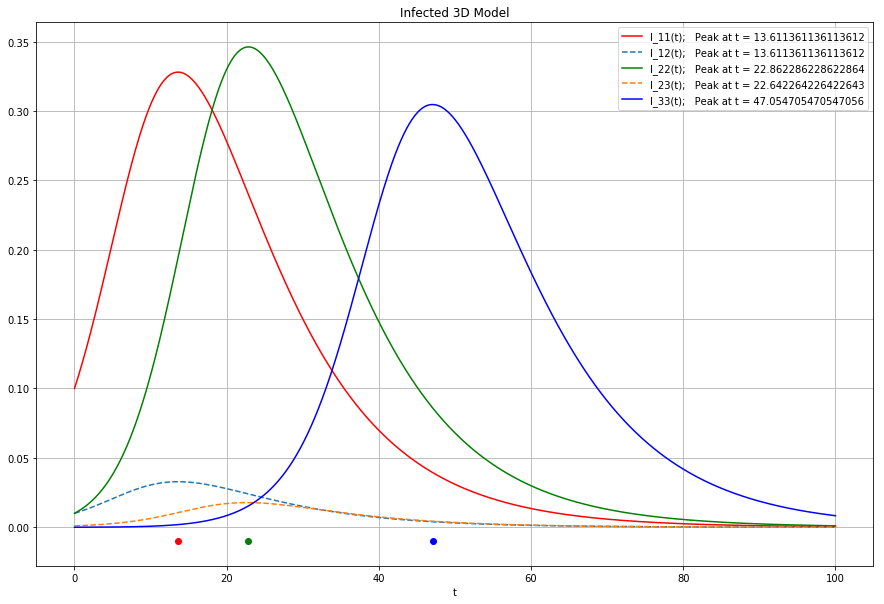

In [27]:
# Plot Infected
plt.figure(figsize=[15, 10])
plt.plot(t, solution[:, 3],
         label=("I_11(t);   Peak at t = " +
                str(t[numpy.argmax(solution[:, 3])])), c='r')
plt.plot(t, solution[:, 4],
         label=("I_12(t);   Peak at t = " +
                str(t[numpy.argmax(solution[:, 4])])), ls='--')
plt.plot(t, solution[:, 5],
         label=("I_22(t);   Peak at t = " +
                str(t[numpy.argmax(solution[:, 5])])), c='g')
plt.plot(t, solution[:, 6],
         label=("I_23(t);   Peak at t = " +
                str(t[numpy.argmax(solution[:, 6])])), ls='--')
plt.plot(t, solution[:, 7],
         label=("I_33(t);   Peak at t = " +
                str(t[numpy.argmax(solution[:, 7])])), c='b')
plt.plot(t[numpy.argmax(solution[:, 3])], -0.01, 'ro')
plt.plot(t[numpy.argmax(solution[:, 5])], -0.01, 'go')
plt.plot(t[numpy.argmax(solution[:, 7])], -0.01, 'bo')
plt.grid()
plt.legend()
plt.xlabel("t")
plt.title("Infected 3D Model")
plt.show()